# Biodiversity and Conservation Biology (Imperial College London)

## Basics in R

### 1. Aims

The aim of this practical is to revise some basic functions in `R` relating to data management and plotting. This practical will also introduce you to `Jupyter Notebooks`, which is a great way to publish reproducible code. 

### Jupyter Notebooks

For your practicals we will be using a combination of `Jupyter Notebooks` and `RStudio`. `Jupyter Notebooks` is an online 'markdown' software, that allows you to code in your browser. `RStudio` is a IDE (Interactive Development Environment) that is designed especially for `R`. IDEs can highlight different types of codes (comments or loops for example), and give you error messages if it looks like something is wrong. That makes `RStudio` a great choice for working in `R`.

For anyone who has trouble with accessing `R`/`RStudio` on their own laptop, Juypter will also work. You can run each block of code, which will return the outcome at the bottom. Ideally, you should manually type each block of code into `RStudio` and run it. Copying and pasting is quicker, but you'll learn a lot less, so try not to be tempted! You'll probably choose to use `RStudio` for your coursework, so it helps to use it if you can. 

### Working directory and using scripts

The first step when starting a new session is to set your working directory. Think of it as the 'folder' that you work out of on your computer. Unless you specify differently, anything that you read in or save will be in this folder. The working directory is set using setwd and the path to the folders location for example "H:/BCB".

`setwd("C:/Users/adevenis/Desktop/BCB Practical 1")`

`getwd()`

Remember that you can find the R help for a particular function by using `?function` or `??function` e.g. `?setwd`. Also recall that `ls()` lists and `rm(list=ls())` clears your workspace.

You can open a new script by going to file->new->R script. Also on windows you can type `CTRL + SHIFT + N`. Remember that when you save this script you need to add .R (Practical1.R). Save often! Although you can write commands directly into the console window, using a script allows you to save a record of your code that can easily be re-run. This is particuarly useful if you find a mistake later on, or want to update models with new data. 

To run a single line of your script at a time in windows, a convinent short cut is `CTRL + ENTER`.

### 2. Revision of data types

We'll start with some basics data manipulation in R to get started. 

For anyone unfamiliar, '#' proceeds comments in scripts that won't be acted on by R, which allows us to label our scripts. Comments are very useful! Try and make as many comments as possible, and use more detail than you think you need. You'd be suprised how quickly you can forget what a function or script does, so detailed comments are a lifesaver!

In [1]:
# We'll first try defining some basic variables

# A number
a <- 5.7
a
class(a)

[1] 5.7

[1] "numeric"

In [2]:
# A string
b <- "hello"
b
class(b)

[1] "hello"

[1] "character"

In [3]:
# A logical object
c <- TRUE
c
class(c)

[1] TRUE

[1] "logical"

In R variables are stored as vectors. Often vectors will be lists of variables such as 1,2,3,4,5. However, even single variables are still stored as vectors! Try `is.vector()` on each of the variables you just created to see! Vectors are one of the most basic (and useful) ways of storing data in R.

Now we'll try creating some basic vectors and manipulating them.

In [4]:
# Generates a sequence from 0 to 9 by intervals of 1. Try ?seq() for more information
d <- seq(0, 9, 1) 
d

[1] 0 1 2 3 4 5 6 7 8 9

In [5]:
# Cocatenate variables into one vector
e <- c(0,1,2,3,4,5,6,7,8,9)
e

[1] 0 1 2 3 4 5 6 7 8 9

`c()` is one of the most used functions in R! It allows you to join together two objects. For example: 


In [6]:
f <- c(d,e)
f

[1] 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9

In [7]:
# Vectors can also be strings or logicals
g <- c("red","blue","green")
g
class(g)

h <- c(TRUE, TRUE, FALSE)
h
class(h)

[1] "red"   "blue"  "green"

[1] "character"

[1]  TRUE  TRUE FALSE

[1] "logical"

In [8]:
# find the length of a vector
length(e) 

[1] 10

In [9]:
# Indexing is an easy way to pull out certain elements of a vector based on their position
e[1] # the first element

e[5] # the fifth element

e[10] # the tenth element

[1] 0

[1] 4

[1] 9

In [10]:
# Indexing can also pull out groups of variables

e[1:5] # elements 1 to 5

e[c(1,4)] # elements 1 and 4

e[-4] # e without the fourth element

[1] 0 1 2 3 4

[1] 0 3

[1] 0 1 2 4 5 6 7 8 9

Vectors can be combined into a matrix.

In [11]:
numbers <- c(1,2,3,4,5)
other.numbers <- c(6,7,8,9,10)
all.numbers <- cbind(numbers, other.numbers) # cbind is short for column bind, which joins two vectors together as columns
all.numbers
class(all.numbers)

numbers,other.numbers
1,6
2,7
3,8
4,9
5,10


[1] "matrix"

Dataframes are special case of matrices, where each column can be a different type. Often this is how ecological data will be collected and stored. This is also most often what you will be handling in R.

In [23]:
numbers <- c(1,2,3,4,5)
characters <- c("a","b","c","d","e")
both.types <- cbind(numbers, characters)
both.types
class(both.types)

numbers,characters
1,a
2,b
3,c
4,d
5,e


[1] "matrix"

What happened there? 'both.types' was a matrix and not a dataframe. Be careful combining strings and numbers together without specifying that you want a dataframe. R will coerce the numbers in strings, so each value is represented as "1", "2", "3"... rather than as actual numbers.

In [24]:
both.types[numbers]
class(both.types[numbers])

[1] "1" "2" "3" "4" "5"

[1] "character"

Instead try being more explicit.

In [25]:
both.types <- data.frame(numbers, characters)
both.types
class(both.types)
class(both.types$numbers)

numbers,characters
<dbl>,<fct>
1,a
2,b
3,c
4,d
5,e


[1] "data.frame"

[1] "numeric"

**An important note: It's tempting to name variables as single letters (a, b, c) as we did at the beginning of the practical. However, for anything slightly more complex than what we've done this becomes confusing very quickly. It's much better to use longer variables like 'numbers' or 'letters'. This describes what the variable is, and makes it easier for yourself and others to read your code and understand it! An easy way to separate words is to use periods '.' or underscores '_'.**

Dataframes have lots of useful functions that make them easy to use. First we'll make a slightly longer dataframe.

In [27]:
small.numbers <- seq(1, 10, 1)
large.numbers <- seq(100, 1000, 100)

all.numbers <- data.frame(small.numbers, large.numbers)
all.numbers

small.numbers,large.numbers
<dbl>,<dbl>
1,100
2,200
3,300
4,400
5,500
6,600
7,700
8,800
9,900


In [28]:
# Get the top 6 values
head(all.numbers)
# Get the bottom 6 values
tail(all.numbers)

,small.numbers,large.numbers
,<dbl>,<dbl>
1,1,100
2,2,200
3,3,300
4,4,400
5,5,500
6,6,600


,small.numbers,large.numbers
,<dbl>,<dbl>
5,5,500
6,6,600
7,7,700
8,8,800
9,9,900
10,10,1000


In [29]:
#Get the structure of the dataframe
str(both.types)

'data.frame':	5 obs. of  2 variables:
 $ numbers   : num  1 2 3 4 5
 $ characters: Factor w/ 5 levels "a","b","c","d",..: 1 2 3 4 5


In [30]:
# Get the number of rows and columns
nrow(all.numbers)
ncol(all.numbers)

[1] 10

[1] 2

In [31]:
# Change the column names
colnames(all.numbers) <- c("small_numbers", "large_numbers")
colnames(all.numbers)
colnames(all.numbers)[1] <- "one_to_ten"
colnames(all.numbers)

[1] "small_numbers" "large_numbers"

[1] "one_to_ten"    "large_numbers"

   
   
  
Indexing dataframes is similar to indexing vectors. The only difference is now there is two dimensions, separated with commas. You can also leave either dimension blank to select all the rows or columns.

In [32]:
# First row and first column
all.numbers[1,1]

# First column
all.numbers[,1]

# First row (because columns can contain different data types, selecting accross a row returns a dataframe)
all.numbers[1,]

[1] 1

[1]  1  2  3  4  5  6  7  8  9 10

,one_to_ten,large_numbers
,<dbl>,<dbl>
1,1,100


In [34]:
# You can also specify columns in a dataframe by using column names in two ways:

#Get the small numbers
all.numbers$one_to_ten

#Get the large numbers (the comma specifies to take them from all rows. Try adding in indexes to the left of the comma)
all.numbers[,"large_numbers"]

[1]  1  2  3  4  5  6  7  8  9 10

[1]  100  200  300  400  500  600  700  800  900 1000


### 3. Reading, writing and .Rdata files ###

Because we're working with jupyter notebooks we won't cover reading and writing in much detail. Briefly, you can export data (especially dataframes) using a few simple functions: 

As a tab-separated text file

`write.table(dataframe.to.export, file="data.txt",sep="\t", row.names=FALSE)`

As a comma-separated file

`write.csv(dataframe.to.export, file="data.csv", row.names=FALSE)`

To read files back in: 

`new.data <- read.table("data.txt",header=TRUE,sep="\t")` 

`new.data <- read.csv("data.csv")`


Objects can also be saved as .RData and loaded back into R at a later time using save() and load(). This is handy when models may take a long time to run, and you don't have to rerun them everytime you start a new R session.

### 4. Plotting data

R can be used to produce a wide array of plots and has a large capacity for customisation. We will touch upon some basic plots which are useful to visual data during your analysis. For more advanced plots, most biolgists use the package *ggplot2*. A useful guide is the R cookbook, that includes information on customising plots: http://www.cookbook-r.com/Graphs/


We'll start with a scatterplot.

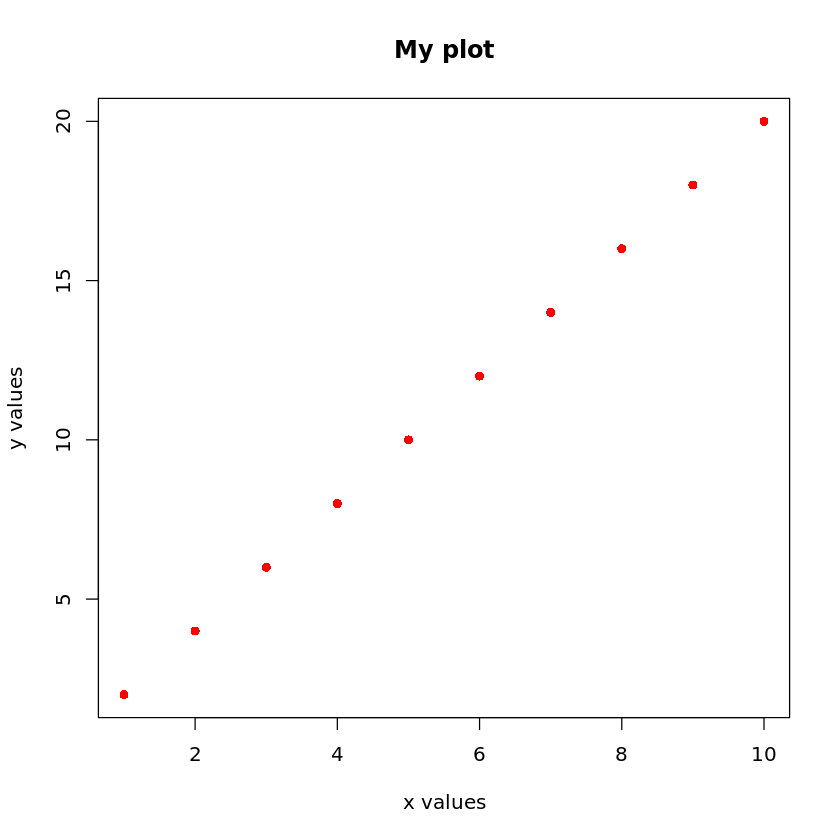

In [7]:
# Create some data
x<-(1:10)
y<-seq(2,20,2)

# Plot a basic scatter plot
plot(x, y, pch=16, col="red", main="My plot", xlab="x values", ylab="y values")

`pch` stands for 'point character' and is the symbol to denote values. Try changing it to other values!

You can also get R to plot the scatter plot as a single line using `type = "l"`

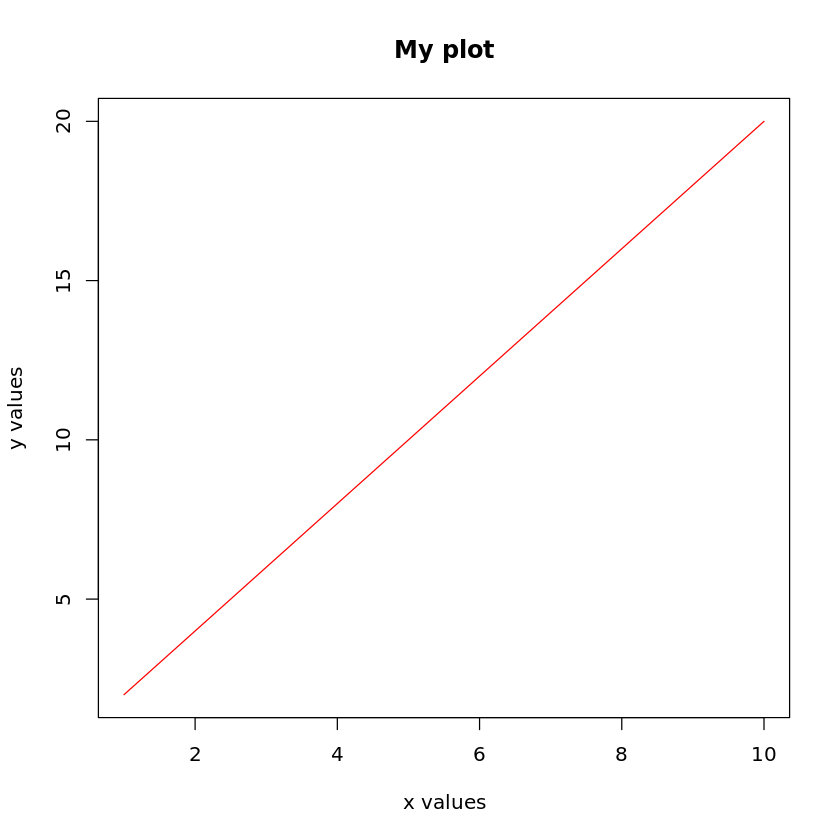

In [8]:
plot(x, y, col="red", main="My plot", xlab="x values", ylab="y values", type = "l")

Some of the most useful plots for visualling the spread of data are histograms and density plots. R comes built in with functions for sampling distributions we can use for plots.

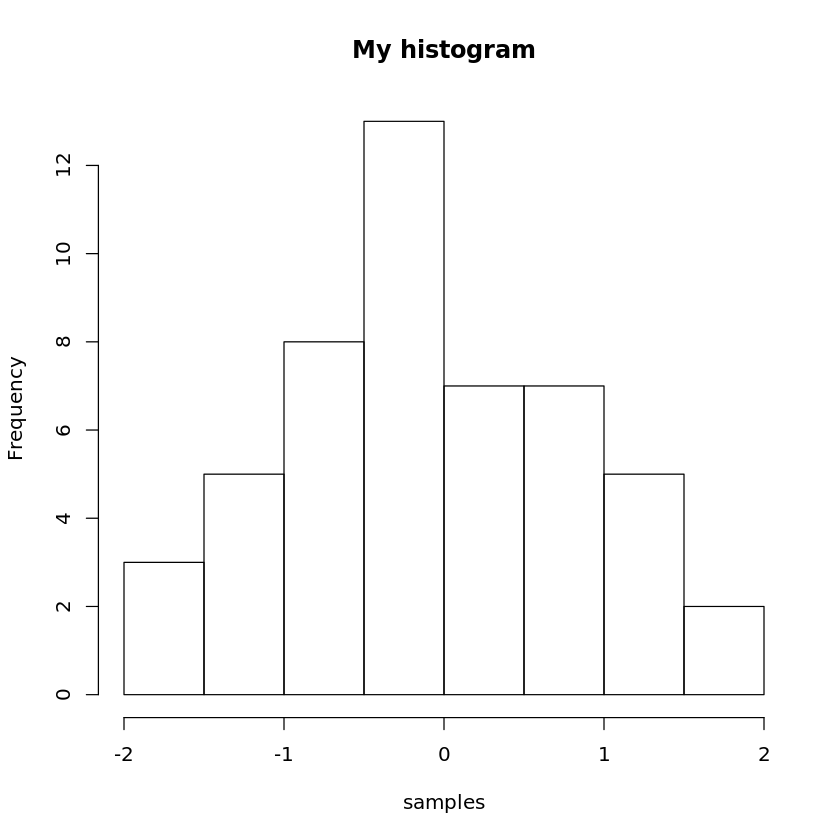

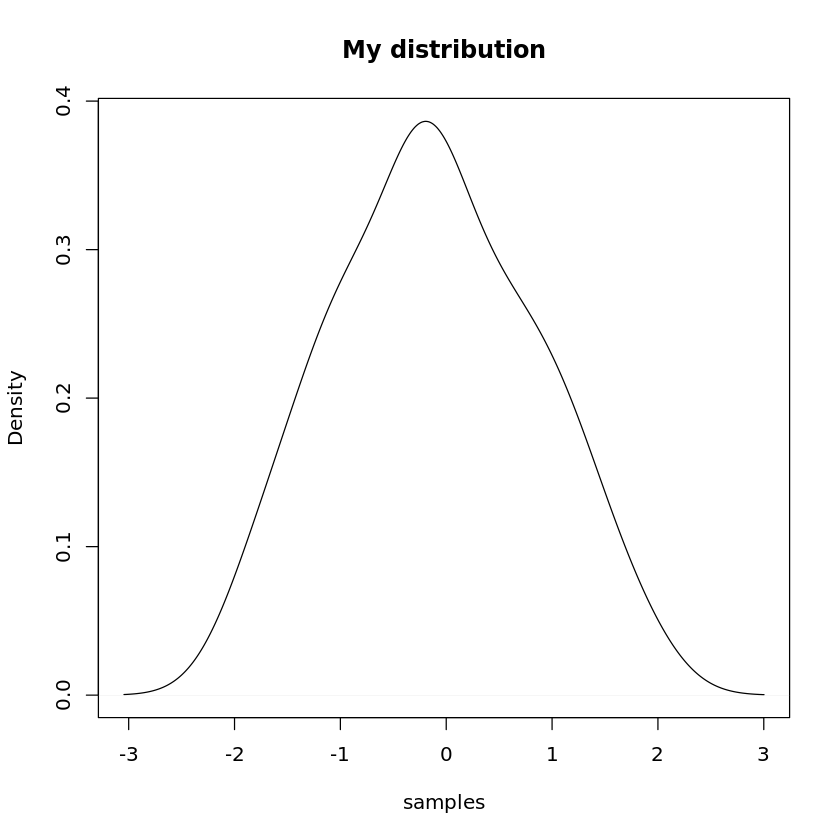

In [12]:
# Sample fifty points randomly from a normal distribution (try taking more or less samples to create smoother curves)
normal.distribution <-rnorm(50)

# Plot a histogram
hist(normal.distribution, main = "My histogram", xlab = "sample value")

# Plot a density plot instead (where frequency of samples is normalised to sum to 1)
plot(density(normal.distribution), main = "My distribution", xlab = "sample value")

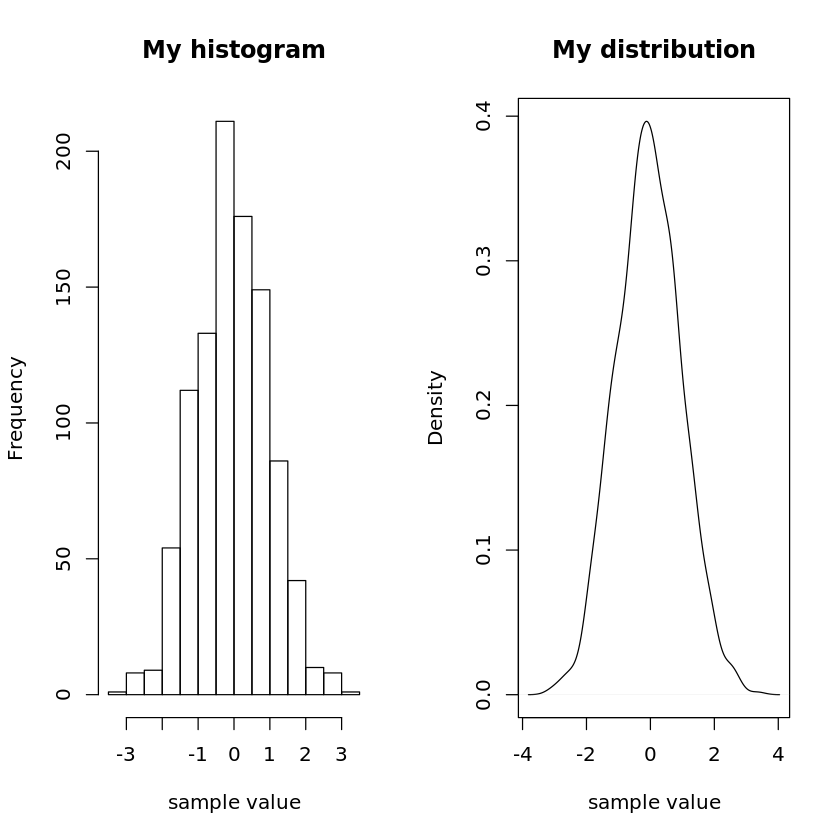

In [39]:
# You can change the grapical parameters to plot graphs side by side
par(mfrow=c(1,2))
hist(normal.distribution, main = "My histogram", xlab = "sample value")
plot(density(normal.distribution), main = "My distribution", xlab = "sample value")

In [43]:
# To reset your graph parameters to the default, simply turn off the open graphical device
dev.off()

jpeg 
   3

When plotting histograms, you can also use the arguement `breaks = n` to manually set the number of breaks. Plots can also be saved as objects for future use the same way as assigning any object. Also look at the functions barplot() and boxplot(). 

You can export your plots using pdf(), jpeg() or png()

In [44]:
# Opens a new graphical device called 'my.plot.name.jpg' in the current working directory
jpeg("My.plot.name.jpg")

# Create a plot as usual
hist(normal.distribution, main = "My histogram", xlab = "sample value")

# Turn off the device to save any changes
dev.off()

png 
  2

### Handling spatial data

### Using the Tidyverse

We have chosen to teach the BCB practicals predominantly using base `R`. This is because anyone new to `R` needs to learn how base `R` works first. However, more and more researchers are choosing to use a group of packages for data handling called the `tidyverse`. These packages provide a slightly different way of coding in `R`, which makes data handling easier. I've already mentioned `ggplot2`, a `tidyverse` package, and one of the most useful in `R`!. We'll cover a few key packages for some  of the practical tasks, but if you'd like to know about coding in the 'tidy' way: 

https://www.tidyverse.org/